# Technical TEST : GLOBAL WEATHER FORECASTING

## import librairies

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import missingno as msno
from xgboost import XGBRegressor

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima


## load data

In [4]:
df=pd.read_csv('./data/raw_data/GlobalWeatherRepository.csv')

## Exploratory Data Analysis

In [5]:
#display first 3 rows
print(df.head(3))

       country location_name  latitude  longitude        timezone  \
0  Afghanistan         Kabul     34.52      69.18      Asia/Kabul   
1      Albania        Tirana     41.33      19.82   Europe/Tirane   
2      Algeria       Algiers     36.76       3.05  Africa/Algiers   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                      

In [6]:
print(f'the shape of the dataframe is : {df.shape} ')#to get the shape of the data
print(f'types of columns are:\n {df.dtypes}')
print(f'unique types of columns are : {df.dtypes.unique()}') 

the shape of the dataframe is : (46967, 41) 
types of columns are:
 country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_m

In [7]:
# Displaying info about the data
print("="*50)
print("INFO ABOUT THE DATA".center(50))
print("="*50)
print(df.info())
print("\n")

# Adding a separator
print("="*50)
print("SUMMARY OF THE DATA".center(50))
print("="*50)
print(df.describe())


               INFO ABOUT THE DATA                
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       46967 non-null  object 
 1   location_name                 46967 non-null  object 
 2   latitude                      46967 non-null  float64
 3   longitude                     46967 non-null  float64
 4   timezone                      46967 non-null  object 
 5   last_updated_epoch            46967 non-null  int64  
 6   last_updated                  46967 non-null  object 
 7   temperature_celsius           46967 non-null  float64
 8   temperature_fahrenheit        46967 non-null  float64
 9   condition_text                46967 non-null  object 
 10  wind_mph                      46967 non-null  float64
 11  wind_kph                      46967 non-null  float64
 12  wind_degr

In [8]:
#  numerical columns
numeric_columns= df.select_dtypes(include='number').columns.array

#  categorical columns
categorical_columns= df.select_dtypes(include='object').columns.array

# Display the counts
print(f'Numeric columns: {numeric_columns}')
print(f'Categorical columns: {categorical_columns}')

# Display the counts
print('\n')
print('*'*50)
print(f'Number of numeric columns: {len(numeric_columns)}')
print(f'Number of categorical columns: {len(categorical_columns)}')





Numeric columns: <NumpyExtensionArray>
[                    'latitude',                    'longitude',
           'last_updated_epoch',          'temperature_celsius',
       'temperature_fahrenheit',                     'wind_mph',
                     'wind_kph',                  'wind_degree',
                  'pressure_mb',                  'pressure_in',
                    'precip_mm',                    'precip_in',
                     'humidity',                        'cloud',
           'feels_like_celsius',        'feels_like_fahrenheit',
                'visibility_km',             'visibility_miles',
                     'uv_index',                     'gust_mph',
                     'gust_kph',  'air_quality_Carbon_Monoxide',
            'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
  'air_quality_Sulphur_dioxide',            'air_quality_PM2.5',
             'air_quality_PM10',     'air_quality_us-epa-index',
   'air_quality_gb-defra-index',            'moon_i

## checking for missing values and duplicates

In [9]:
#checking for missing values
missing_values=df.isnull().sum()
print("Missing values:\n", missing_values)
missing_values = df.isnull().sum().sum()

if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print(f"No missing values are present in the Dataset.")

Missing values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

<Axes: >

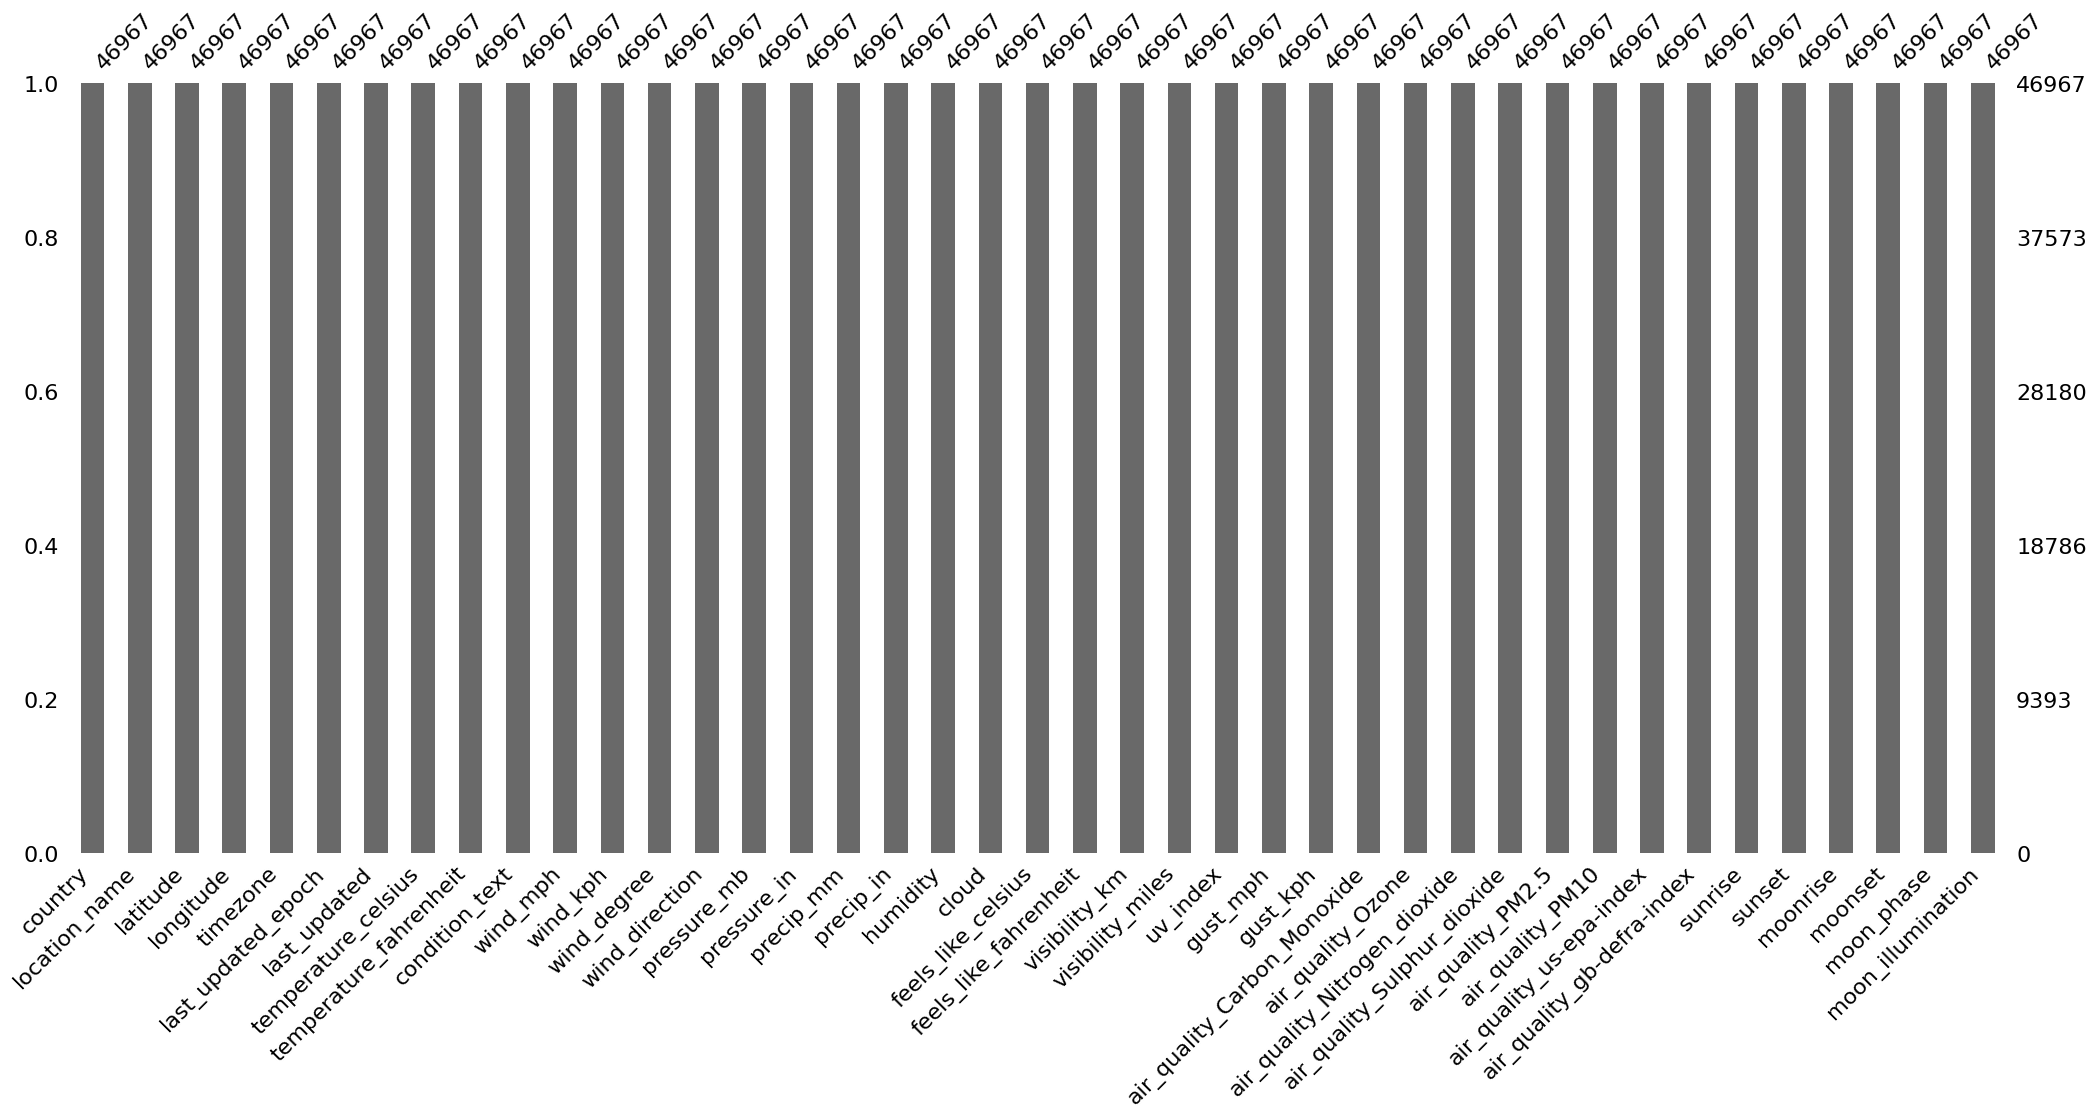

In [10]:

msno.bar(df)
 

In [11]:
# Count the number of duplicate rows
duplicates_row_count = df.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if df.duplicated().any():
    print(f"Duplicates are present. Total duplicate rows: {duplicates_row_count}")
else:
    print(f"No duplicates are present in the Dataset.")

No duplicates are present in the Dataset.


In [12]:
# display unique number of values for each  categorical column
print("\n numbers of unique values for categorical columns :\n")
for col in categorical_columns:
        print(f"{col} : {df[col].nunique()} classes")




 numbers of unique values for categorical columns :

country : 210 classes
location_name : 248 classes
timezone : 190 classes
last_updated : 7819 classes
condition_text : 44 classes
wind_direction : 16 classes
sunrise : 436 classes
sunset : 534 classes
moonrise : 1441 classes
moonset : 1441 classes
moon_phase : 8 classes


In [13]:
# display unique number of values for each  numeric column
print("number of unique values for each numeric column :")
for col in numeric_columns:
        print(f"{col} : {df[col].nunique()} unique values")

number of unique values for each numeric column :
latitude : 383 unique values
longitude : 389 unique values
last_updated_epoch : 476 unique values
temperature_celsius : 617 unique values
temperature_fahrenheit : 1024 unique values
wind_mph : 162 unique values
wind_kph : 162 unique values
wind_degree : 360 unique values
pressure_mb : 78 unique values
pressure_in : 194 unique values
precip_mm : 482 unique values
precip_in : 61 unique values
humidity : 99 unique values
cloud : 101 unique values
feels_like_celsius : 721 unique values
feels_like_fahrenheit : 1219 unique values
visibility_km : 68 unique values
visibility_miles : 13 unique values
uv_index : 160 unique values
gust_mph : 469 unique values
gust_kph : 705 unique values
air_quality_Carbon_Monoxide : 2679 unique values
air_quality_Ozone : 623 unique values
air_quality_Nitrogen_dioxide : 1379 unique values
air_quality_Sulphur_dioxide : 1430 unique values
air_quality_PM2.5 : 2706 unique values
air_quality_PM10 : 3923 unique values
a

## columns distribution

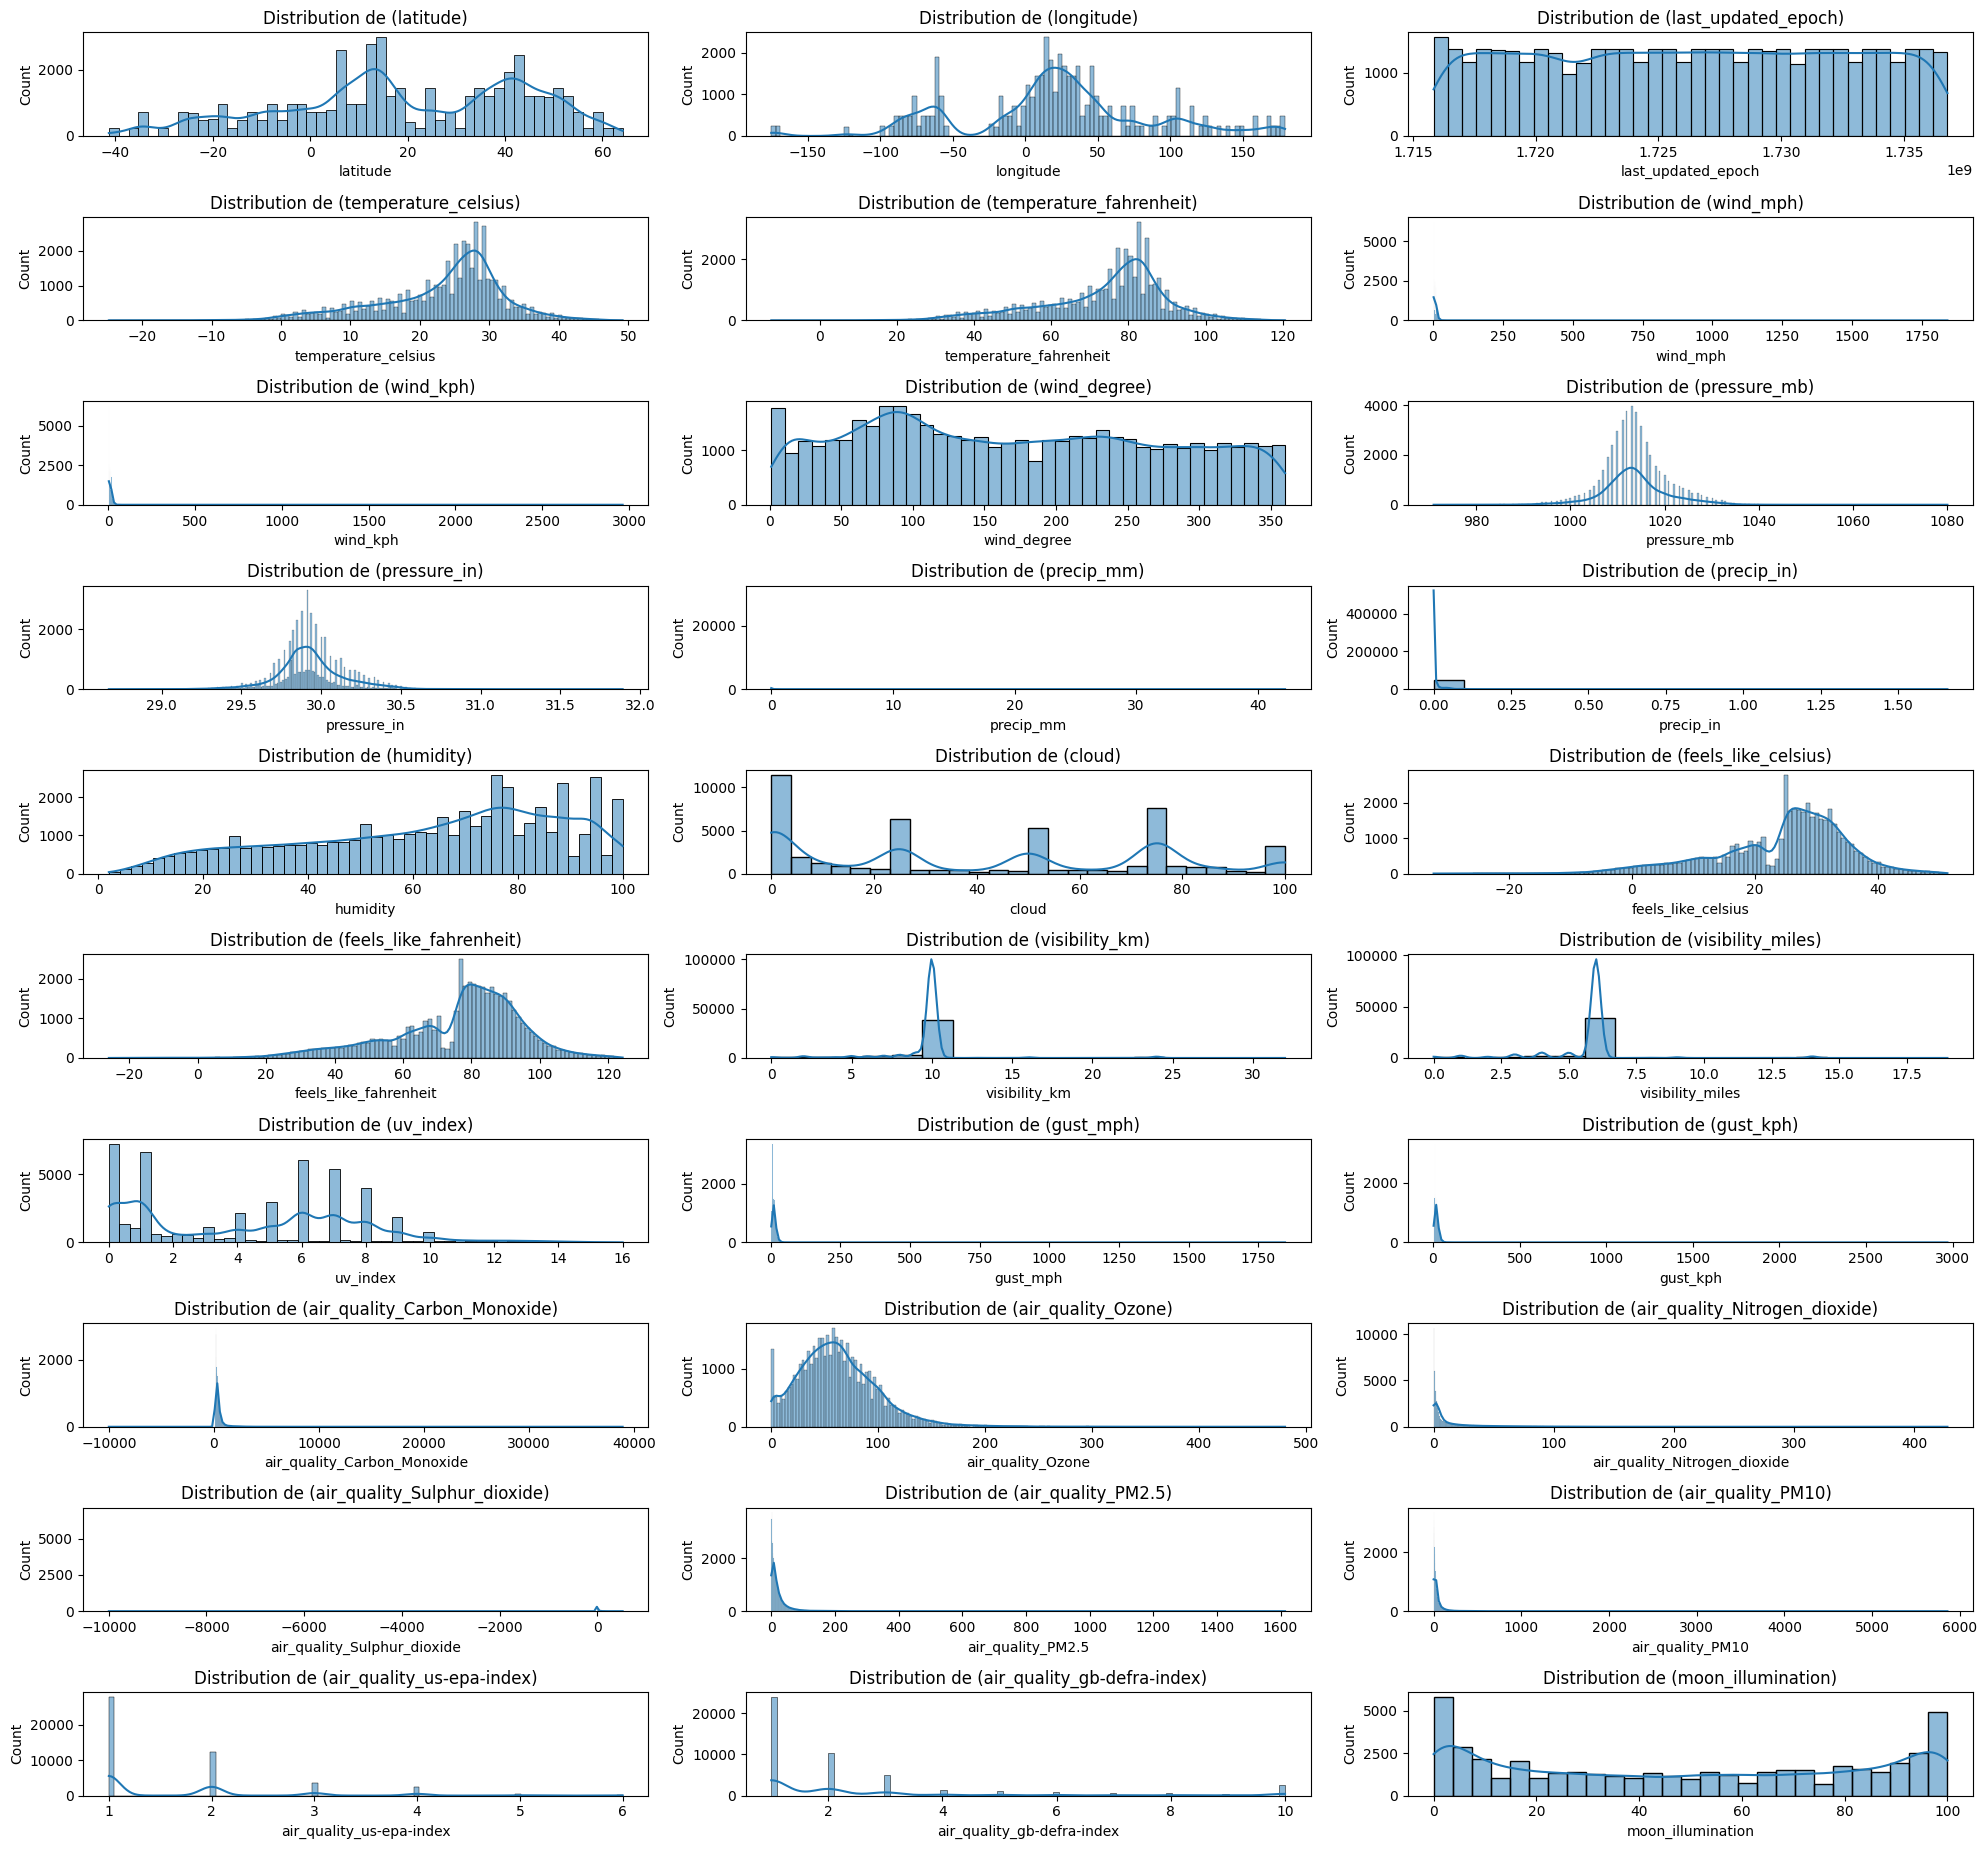

In [14]:

plt.figure(figsize=(20, 20))
num_columns = len(numeric_columns)
num_rows = (num_columns // 3) + 1

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de ({col})')
plt.tight_layout()

From the distribution plots, we can observe:

- Skewness or outliers in some features (e.g., precip_mm, gust_mph, air_quality_Carbon_Monoxide).
- Wide value ranges for some features, like wind_kph and pressure_mb

## Data preprocessing

In [15]:
# Example: Log transformation
skewed_features = ['precip_mm', 'gust_mph', 'air_quality_Carbon_Monoxide']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])  # log1p ensures log(0) is handled


c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## boxplot visualization for detecting outliers

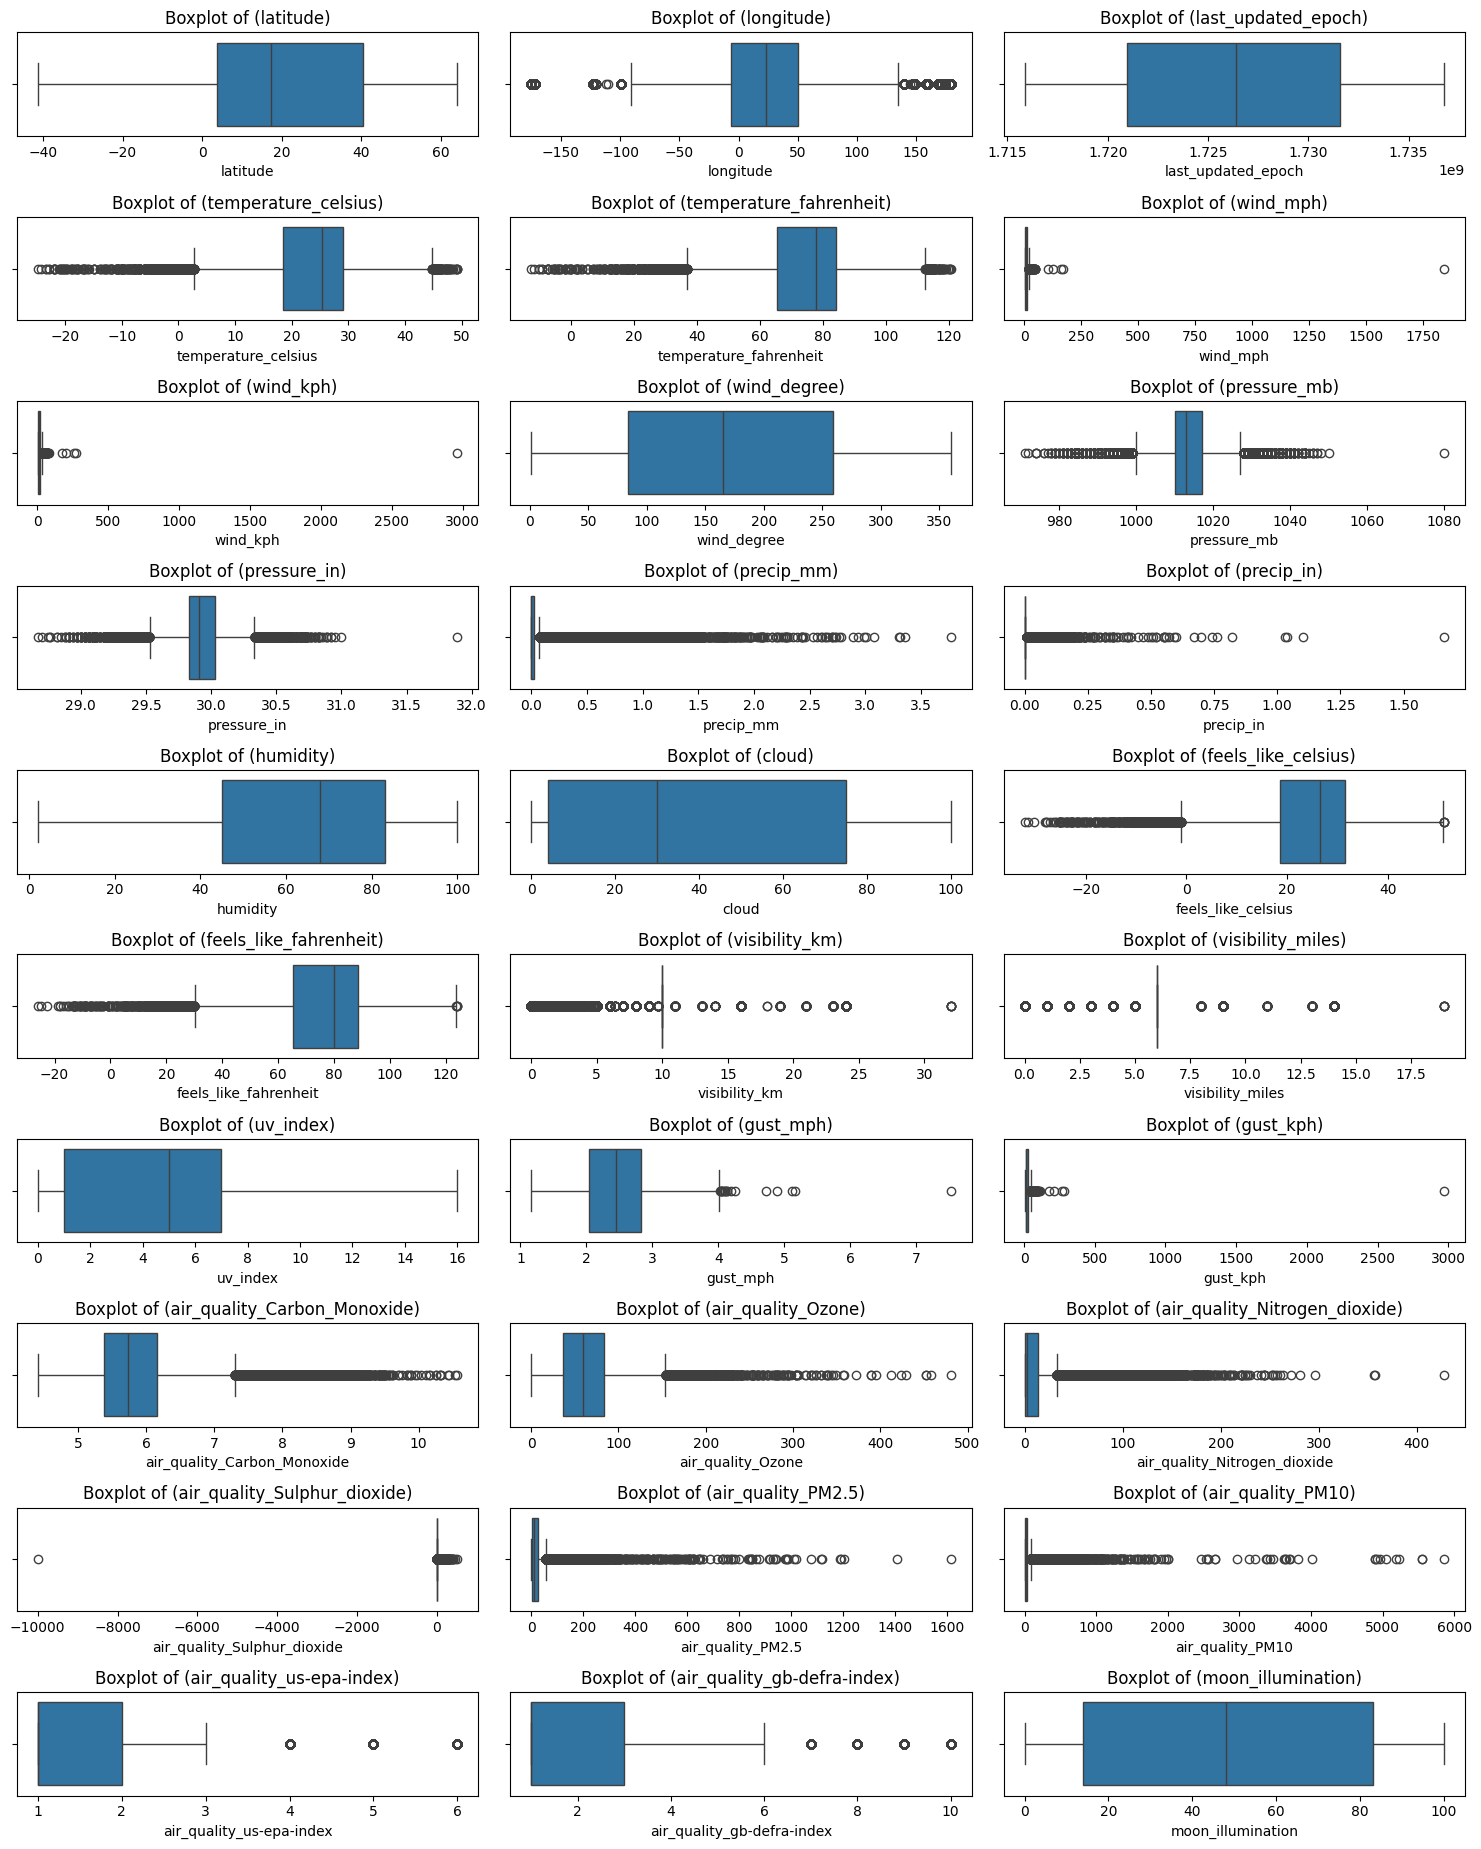

In [16]:
plt.figure(figsize=(15, 20))
num_columns = len(numeric_columns)
num_rows = (num_columns // 3) + 1

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of ({col})')

plt.tight_layout()


Here we can conclude that there are categorical columns (even they are numeric)

In [17]:
# Identifier les valeurs aberrantes pour les colonnes numériques
print("outliers for each numeric columns :")
columns_with_outliers = []
for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Définir les bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Trouver les valeurs aberrantes
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if len(outliers) > 0:
            print(f"{col} : {len(outliers)} outliers")
            columns_with_outliers.append(col)



outliers for each numeric columns :
longitude : 3613 outliers
temperature_celsius : 1527 outliers
temperature_fahrenheit : 1527 outliers
wind_mph : 485 outliers
wind_kph : 593 outliers
pressure_mb : 3058 outliers
pressure_in : 3146 outliers
precip_mm : 9092 outliers
precip_in : 7643 outliers
feels_like_celsius : 1167 outliers
feels_like_fahrenheit : 1172 outliers
visibility_km : 8460 outliers
visibility_miles : 8378 outliers
gust_mph : 17 outliers
gust_kph : 878 outliers
air_quality_Carbon_Monoxide : 2136 outliers
air_quality_Ozone : 949 outliers
air_quality_Nitrogen_dioxide : 6183 outliers
air_quality_Sulphur_dioxide : 6988 outliers
air_quality_PM2.5 : 3898 outliers
air_quality_PM10 : 4800 outliers
air_quality_us-epa-index : 3095 outliers
air_quality_gb-defra-index : 4270 outliers


In [18]:
#Removing outliers using IQR
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

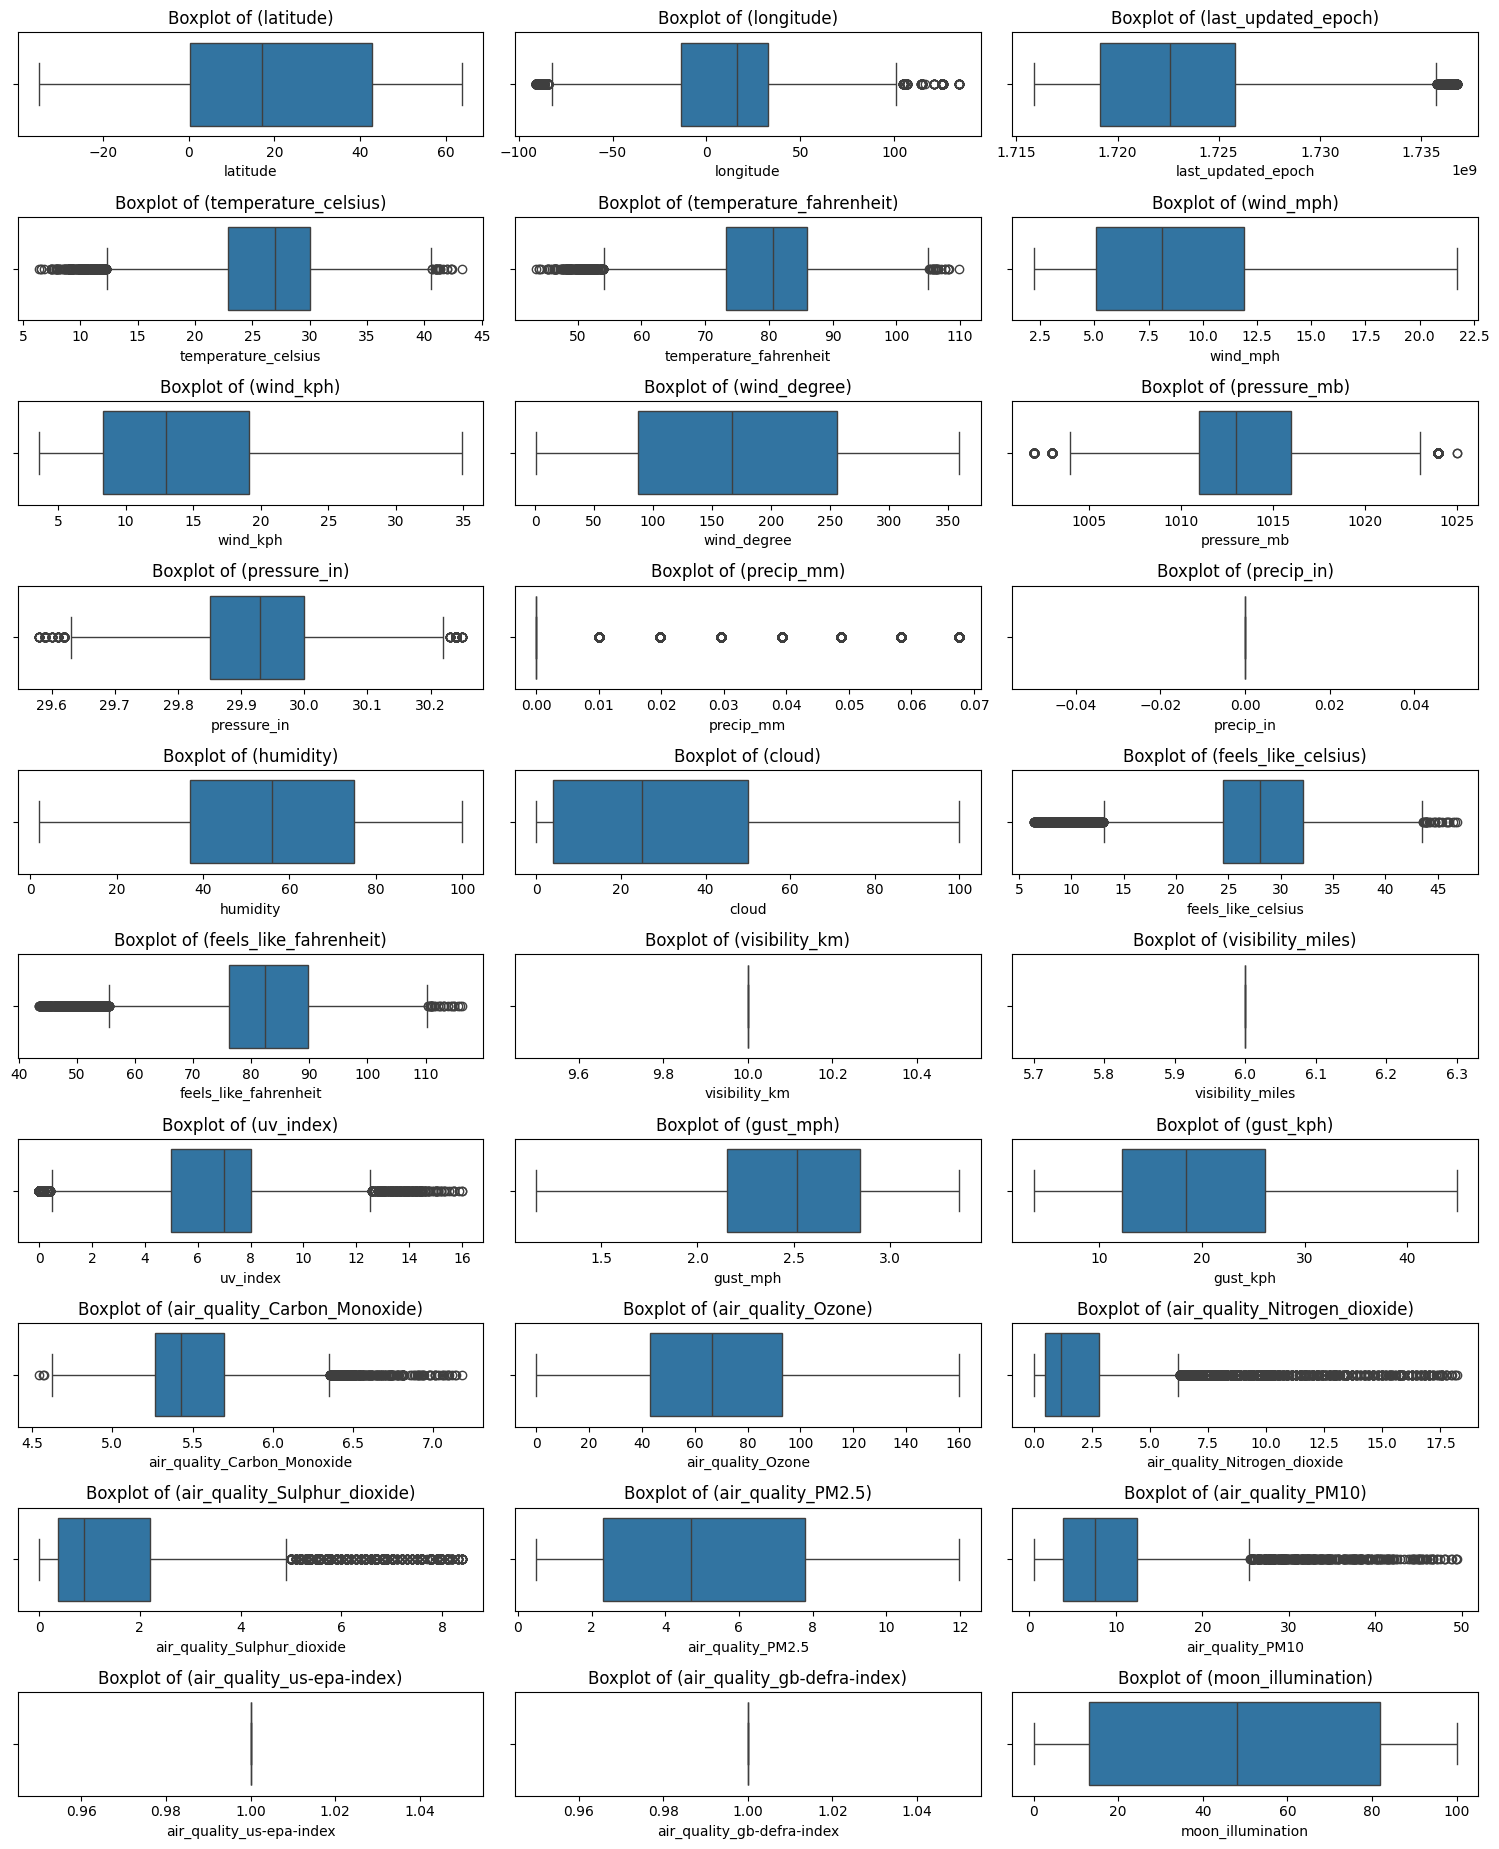

In [19]:
plt.figure(figsize=(15, 20))
num_columns = len(numeric_columns)
num_rows = (num_columns // 3) + 1

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of ({col})')

plt.tight_layout()


In [20]:
# Convert 'lastupdated' to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])
df = df.sort_values(by='last_updated')

In [21]:
# Convert time-related columns to datetime
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])


C:\Users\hayfa\AppData\Local\Temp\ipykernel_11964\571916036.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'])
C:\Users\hayfa\AppData\Local\Temp\ipykernel_11964\571916036.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'])


In [22]:
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)

In [23]:
wind_direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df['wind_direction'] = df['wind_direction'].map(wind_direction_mapping)


In [24]:
df['day'] = df['last_updated'].dt.day
df['month'] = df['last_updated'].dt.month
df['hour'] = df['last_updated'].dt.hour
df['year'] = df['last_updated'].dt.year

In [25]:
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


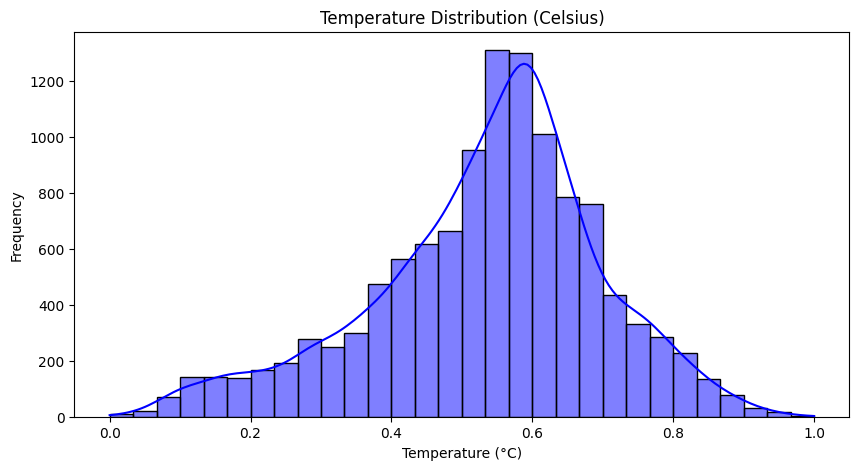

In [26]:
# Set color palette
sns.set_palette("Set2") 

# Temperature distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True, color='blue')
plt.title("Temperature Distribution (Celsius)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


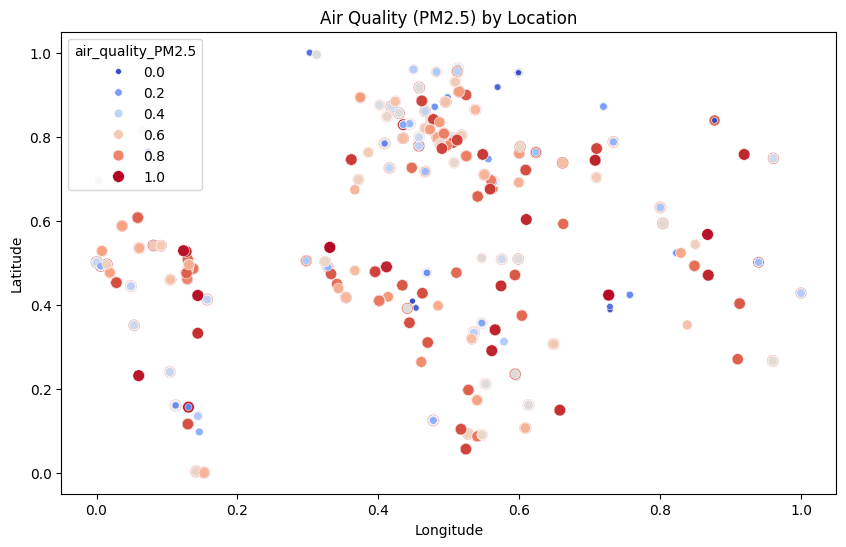

In [27]:
# Scatter plot for air quality (PM2.5) vs. location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='air_quality_PM2.5', palette='coolwarm', size='air_quality_PM2.5')
plt.title("Air Quality (PM2.5) by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

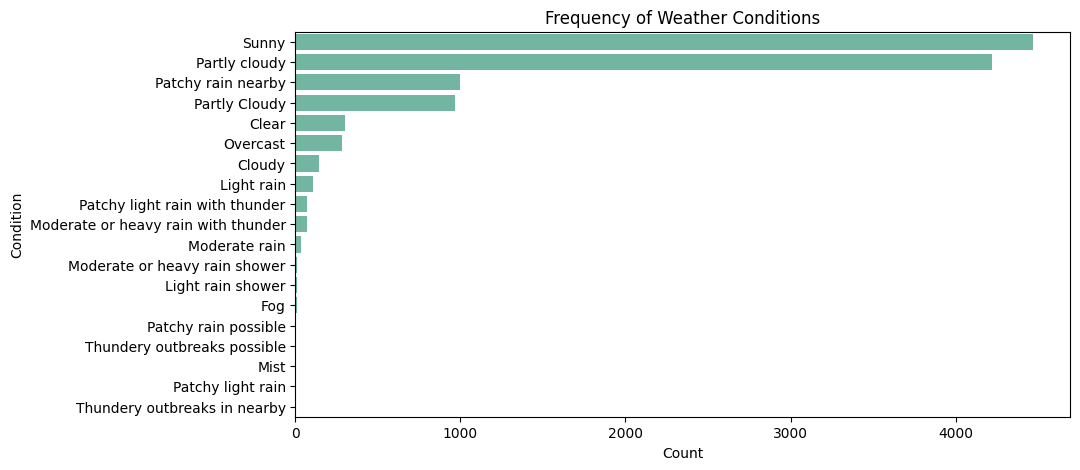

In [28]:
# Count plot for condition_text
plt.figure(figsize=(10, 5))
sns.countplot(y=df['condition_text'], order=df['condition_text'].value_counts().index)
plt.title("Frequency of Weather Conditions")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()

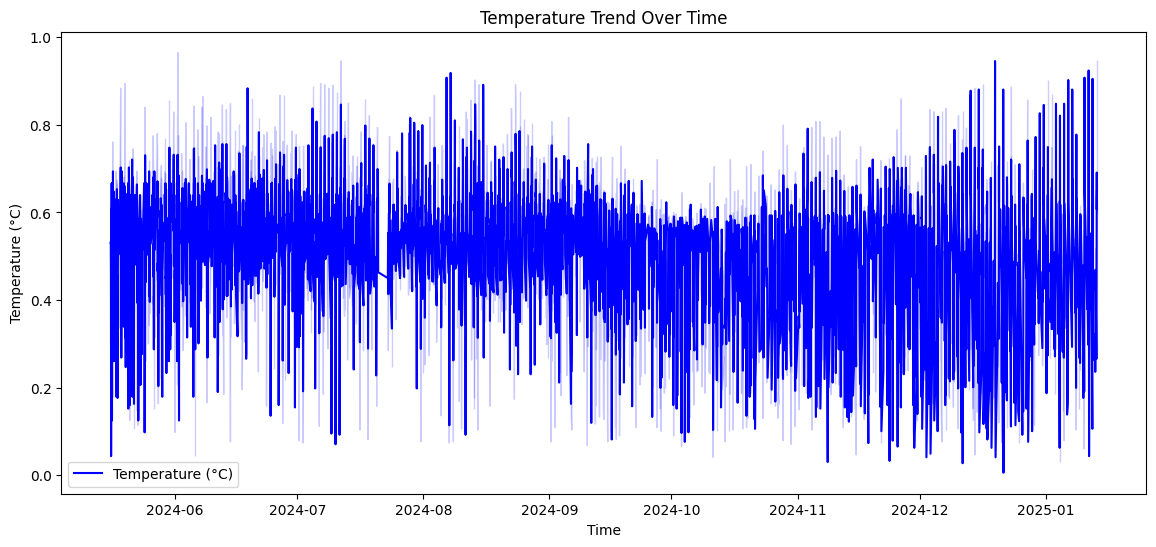

In [29]:
# Line plot: Temperature over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', label='Temperature (°C)', color='blue')
plt.title("Temperature Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

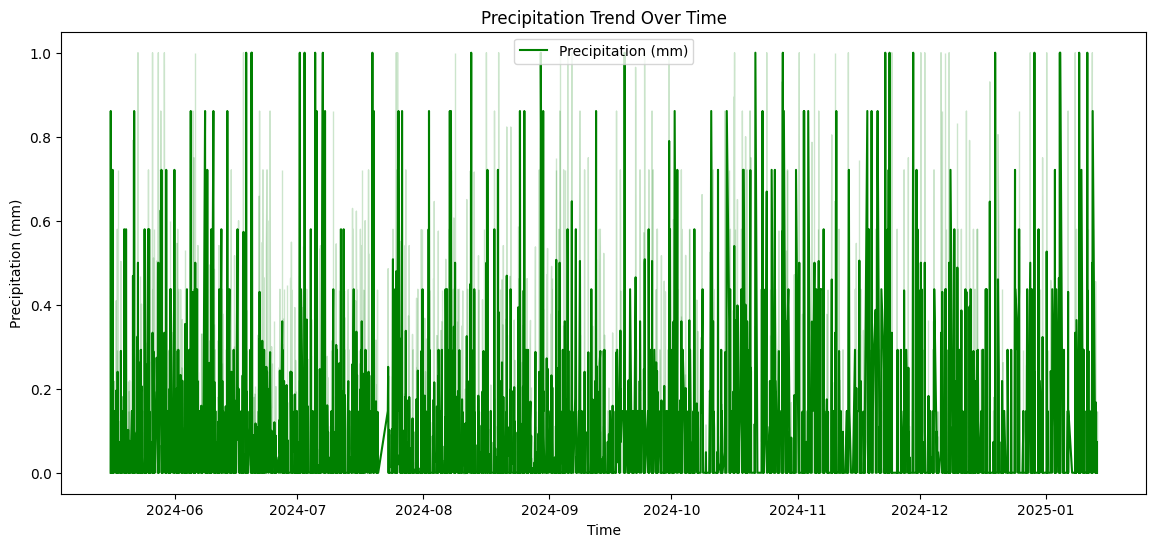

In [30]:
# Line plot: Precipitation over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='last_updated', y='precip_mm', label='Precipitation (mm)', color='green')
plt.title("Precipitation Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.show()

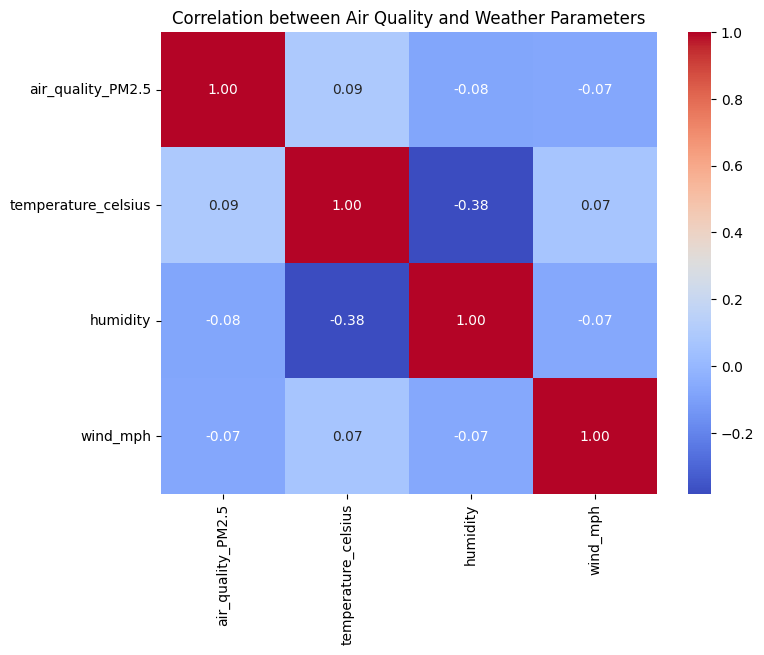

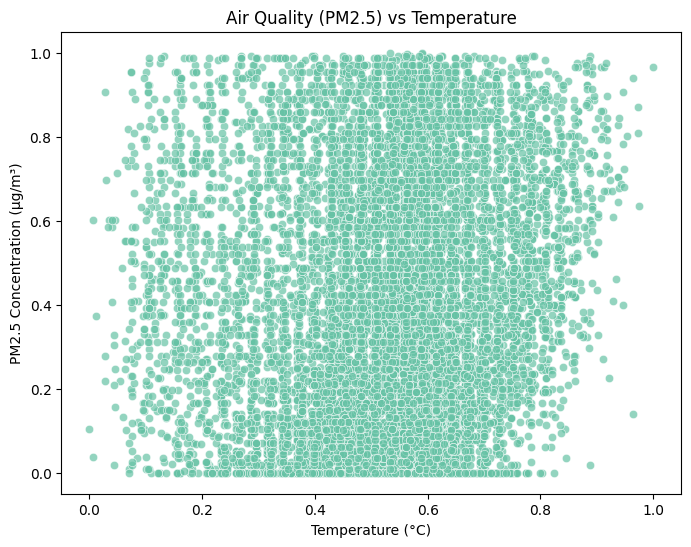

In [31]:
#Goal: Study correlations between air quality and weather parameters.

# Calculate correlations
corr_matrix = df[['air_quality_PM2.5', 'temperature_celsius', 'humidity', 'wind_mph']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Air Quality and Weather Parameters')
plt.show()

# Scatterplot: Air Quality vs. Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='air_quality_PM2.5', data=df, alpha=0.7)
plt.title('Air Quality (PM2.5) vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()


## feature seletion 

In [32]:
df = pd.get_dummies(df, columns=[ 'condition_text'], drop_first=True,dtype='int64')


                                              Feature  Mutual Information
11                              feels_like_fahrenheit            2.233103
10                                 feels_like_celsius            2.213636
8                                            humidity            0.675102
14                                           uv_index            0.591261
0                                  last_updated_epoch            0.307930
9                                               cloud            0.200277
6                                         pressure_in            0.195567
18                                  air_quality_Ozone            0.186483
3                                         wind_degree            0.137927
37                       condition_text_Partly cloudy            0.137555
25                                  moon_illumination            0.135786
19                       air_quality_Nitrogen_dioxide            0.132457
5                                     

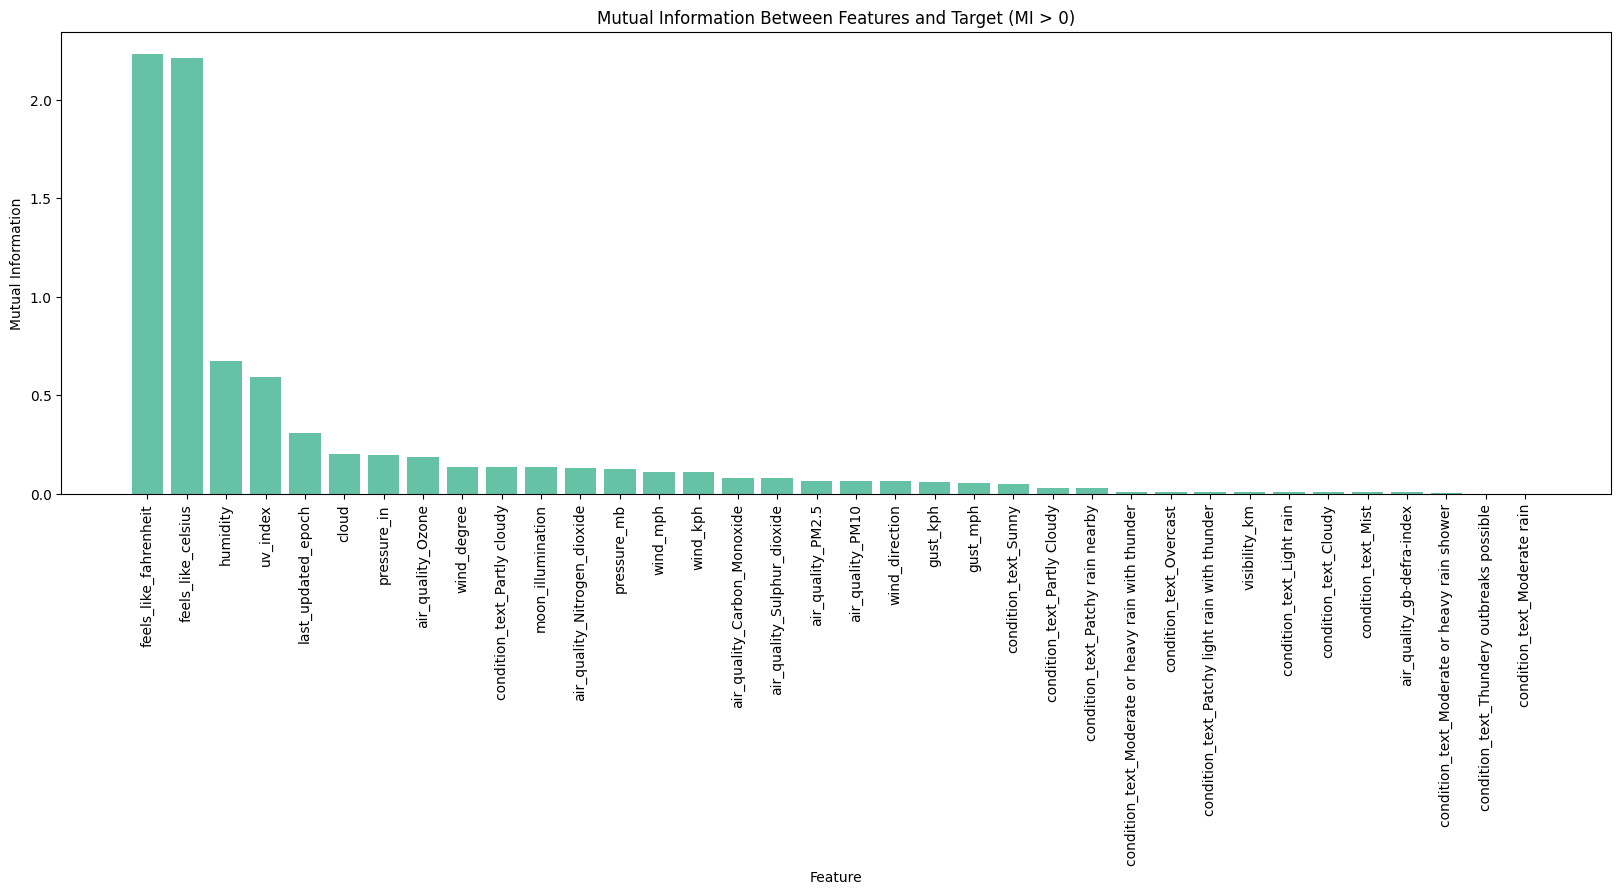

In [33]:

# Assuming 'target' is your target column (numeric for regression tasks)
X= df.drop(columns=['temperature_celsius','country','precip_mm','last_updated','latitude','longitude','sunrise','sunset','moonrise','moonset','location_name','day','month','hour','moon_phase','timezone','temperature_fahrenheit'],axis=1)
y_temp = df['temperature_celsius']  # Target for temperature
y_precip = df['precip_mm']  # Target for precipitation
# Compute mutual information for regression tasks
mutual_info = mutual_info_regression(X, y_temp)

# Convert the result into a DataFrame for better visualization
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort by mutual information value
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Filter out features with mutual information <= 0
non_contributing_features = mutual_info_df[mutual_info_df['Mutual Information'] <= 0]['Feature'].tolist()

# Filtered DataFrame with only mutual information > 0
mutual_info_df_filtered = mutual_info_df[mutual_info_df['Mutual Information'] > 0]

# Display the filtered mutual information DataFrame
print(mutual_info_df_filtered)

# Display non-contributing features (with mutual information <= 0)
print("Features with no mutual information (contributing 0 to prediction):", non_contributing_features)
 
# Plot the mutual information (only features with MI > 0)
plt.figure(figsize=(20, 6))
plt.bar(mutual_info_df_filtered['Feature'], mutual_info_df_filtered['Mutual Information'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information Between Features and Target (MI > 0)')
plt.show()



In [34]:
# Drop non-contributing features (with mutual information <= 0)
X_filtered = X.drop(columns=non_contributing_features,axis=1)

# Confirm the shape of the new feature set  
print(X_filtered.shape)


(11703, 36)


In [36]:
X= df.drop(columns=['temperature_celsius','precip_mm','last_updated','latitude','longitude','sunrise','sunset','moonrise','moonset','location_name','day','month','hour','moon_phase','timezone','temperature_fahrenheit'],axis=1)

Temperature MAE: 0.006983326561159688, RMSE: 0.011801878286688985
Precipitation MAE: 0.08119928555319422, RMSE: 0.15995314751287293


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


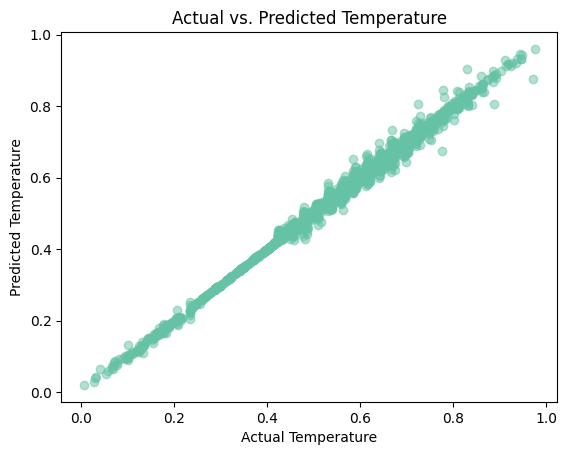

In [37]:
X= df.drop(columns=['country','temperature_celsius','precip_in','precip_mm','last_updated','latitude','longitude','sunrise','sunset','moonrise','moonset','location_name','day','month','hour','moon_phase','timezone','temperature_fahrenheit'],axis=1)


y_temp = df['temperature_celsius']  # Target for temperature
y_precip = df['precip_mm']  # Target for precipitation

X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train, X_test, y_precip_train, y_precip_test = train_test_split(X, y_precip, test_size=0.2, random_state=42)



# Train model for temperature
temp_model = RandomForestRegressor(random_state=42)
temp_model.fit(X_train, y_temp_train)

# Train model for precipitation
precip_model = RandomForestRegressor(random_state=42)
precip_model.fit(X_train, y_precip_train)
# Temperature predictions
y_temp_pred = temp_model.predict(X_test)
temp_mae = mean_absolute_error(y_temp_test, y_temp_pred)
temp_rmse = mean_squared_error(y_temp_test, y_temp_pred, squared=False)

# Precipitation predictions
y_precip_pred = precip_model.predict(X_test)
precip_mae = mean_absolute_error(y_precip_test, y_precip_pred)
precip_rmse = mean_squared_error(y_precip_test, y_precip_pred, squared=False)

print(f'Temperature MAE: {temp_mae}, RMSE: {temp_rmse}')
print(f'Precipitation MAE: {precip_mae}, RMSE: {precip_rmse}')
 
plt.scatter(y_temp_test, y_temp_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.show()



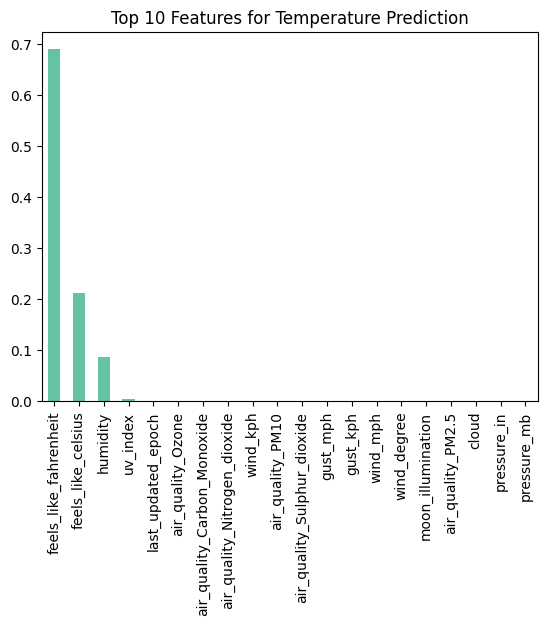

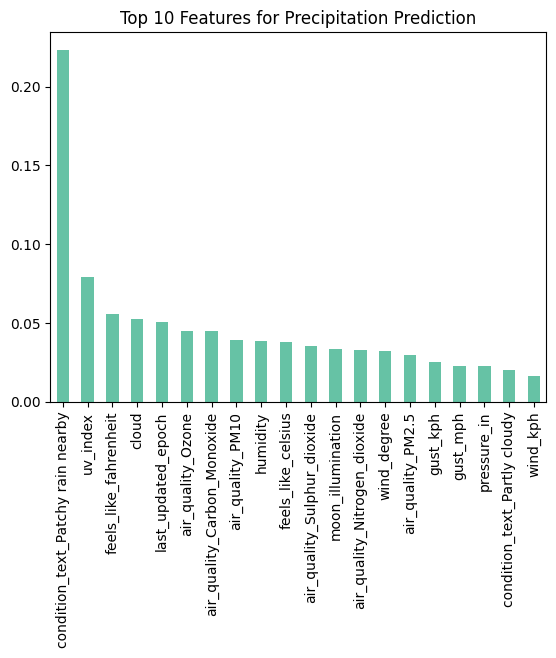

In [38]:
feature_importance = pd.Series(temp_model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(20).plot(kind='bar', title='Top 10 Features for Temperature Prediction')
plt.show()

feature_importance_precip = pd.Series(precip_model.feature_importances_, index=X_train.columns)
feature_importance_precip.nlargest(20).plot(kind='bar', title='Top 10 Features for Precipitation Prediction')
plt.show()


In [39]:

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=10)
model.fit(X_train, y_precip_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Temperature MAE: 0.006983326561159688, RMSE: 0.011801878286688985
Precipitation MAE: 0.08074823010517482, RMSE: 0.16336607088056948


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


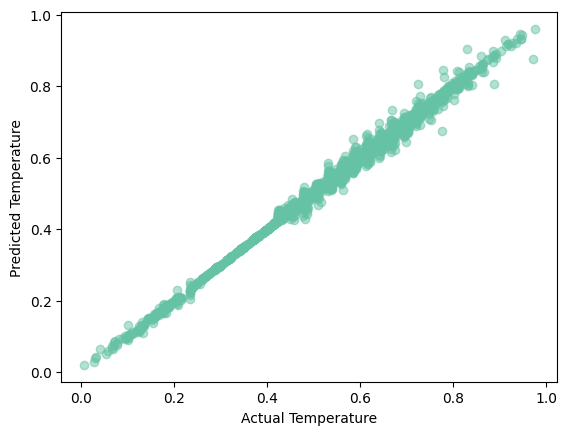

In [40]:
# Precipitation predictions
y_precip_pred = model.predict(X_test)
precip_mae = mean_absolute_error(y_precip_test, y_precip_pred)
precip_rmse = mean_squared_error(y_precip_test, y_precip_pred, squared=False)

print(f'Temperature MAE: {temp_mae}, RMSE: {temp_rmse}')
print(f'Precipitation MAE: {precip_mae}, RMSE: {precip_rmse}')

plt.scatter(y_temp_test, y_temp_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
# plt.title('ctual vs. Predicted Temperature')
plt.show()

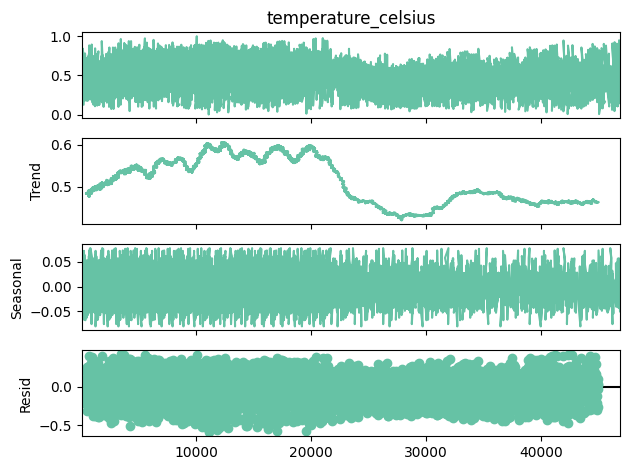

In [41]:
decomposition = seasonal_decompose(df['temperature_celsius'], model='additive', period=365)
decomposition.plot()
plt.show()


In [42]:
# Set 'last_updated' as the index for time series
df = df.sort_values('last_updated')
df.set_index('last_updated', inplace=True)

In [43]:

result = adfuller(df['temperature_celsius'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("The series is non-stationary. Differencing is required.")
else:
    print("The series is stationary.")


ADF Statistic: -9.638327461312452
p-value: 1.544907502105678e-16
The series is stationary.


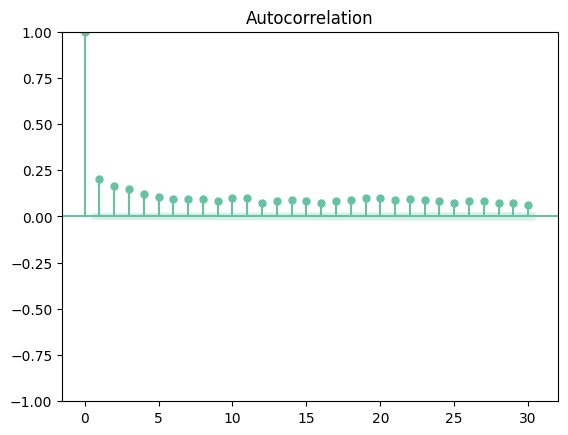

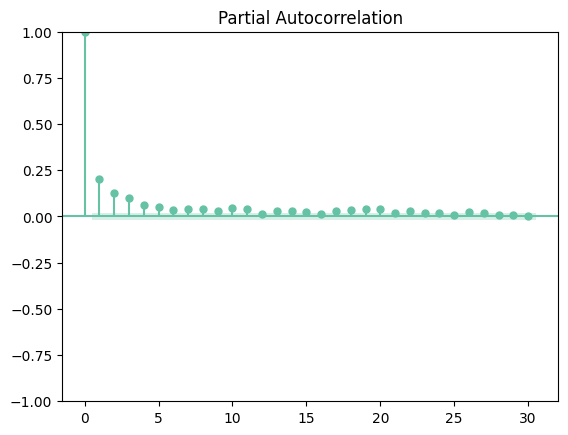

In [44]:

plot_acf(df['temperature_celsius'].dropna(), lags=30)
plt.show()

plot_pacf(df['temperature_celsius'].dropna(), lags=30)
plt.show()


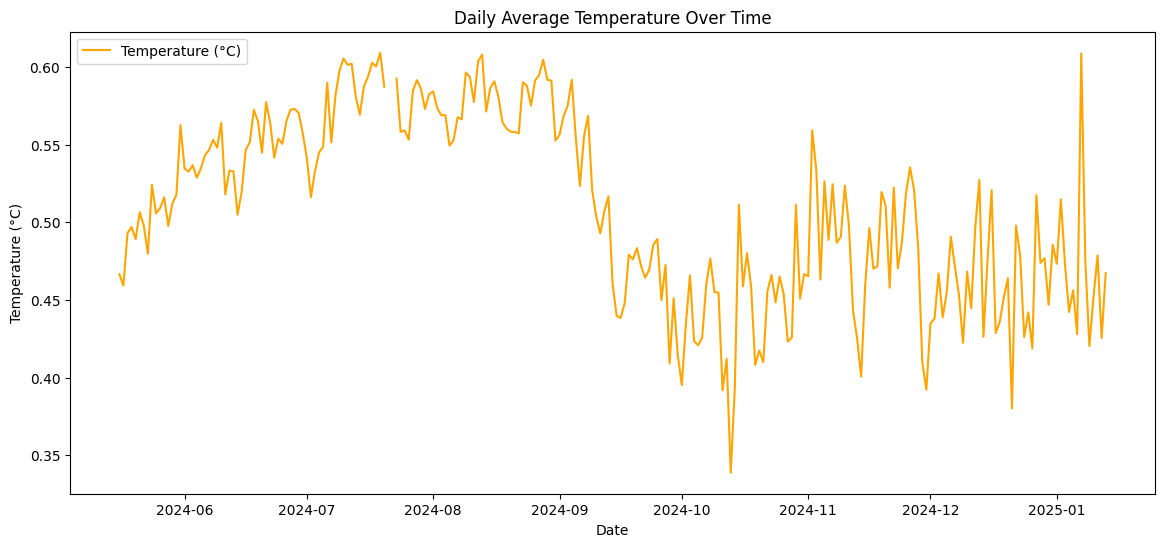

In [45]:
# Resample data to daily frequency 
daily_data = df['temperature_celsius'].resample('D').mean()


# Visualize the time series
plt.figure(figsize=(14, 6))
plt.plot(daily_data, label='Temperature (°C)', color='orange')
plt.title("Daily Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

In [46]:

# Split data into train and test
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
train=train.dropna()

adf_test = adfuller(train)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
train_diff = train.diff().dropna()
adf_test = adfuller(train_diff)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] <0.05:
    print("there is stationarity")

ADF Statistic: -1.3438916267065313
p-value: 0.6088604469684131
ADF Statistic: -8.34160177825457
p-value: 3.1651864862375077e-13
there is stationarity


<Figure size 1200x600 with 0 Axes>

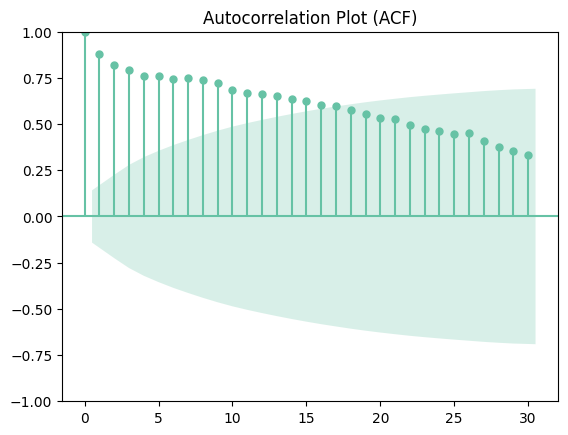

<Figure size 1200x600 with 0 Axes>

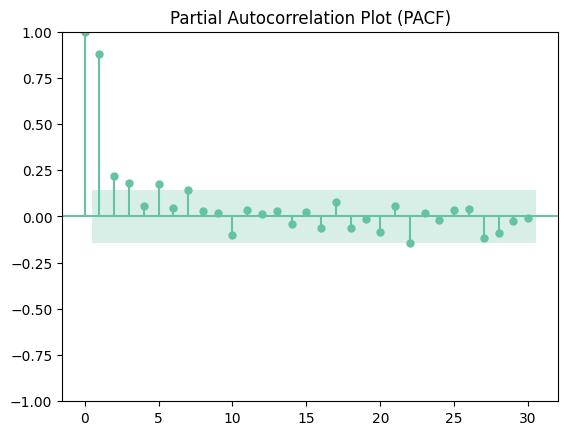

In [47]:

# Split data into train and test
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
train=train.dropna()

plt.figure(figsize=(12, 6))
plot_acf(train, lags=30)
plt.title("Autocorrelation Plot (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(train, lags=30)
plt.title("Partial Autocorrelation Plot (PACF)")
plt.show()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

ARIMA - MSE: 0.0028014121009215997, MAE: 0.04484956280286576


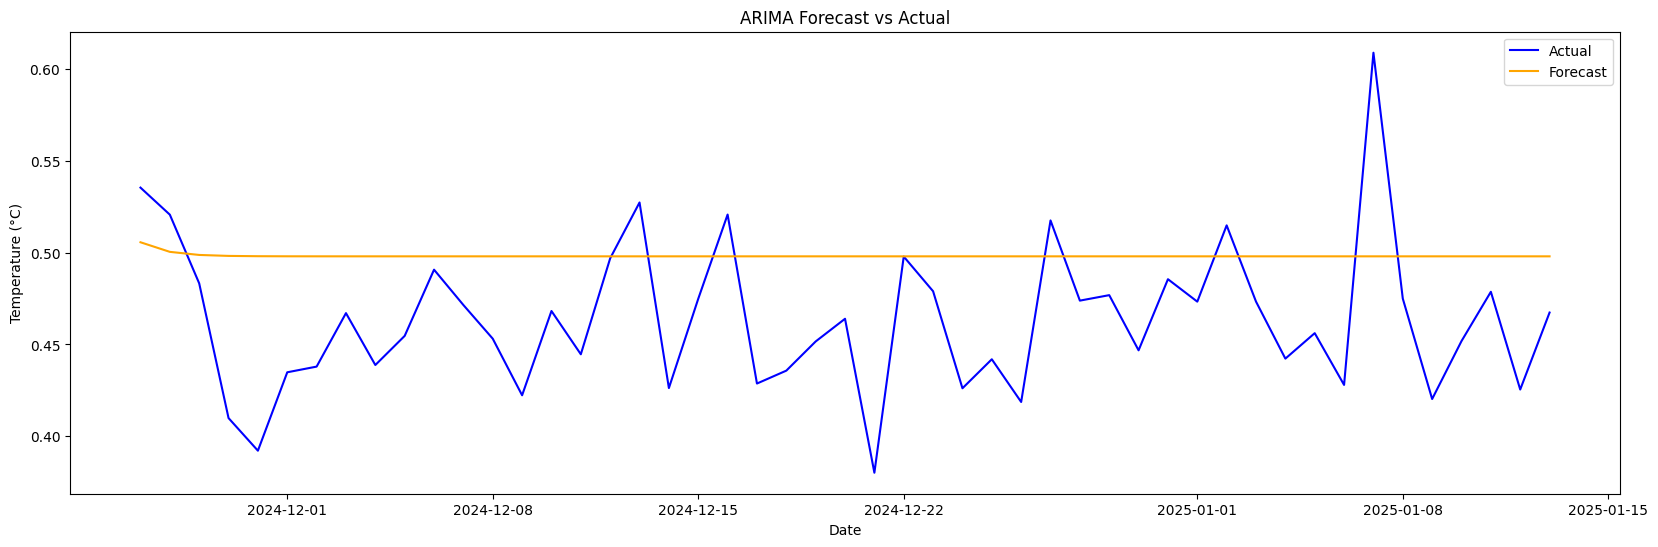

In [48]:

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 1)) 
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))
forecast.index = test.index
# Evaluate model
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"ARIMA - MSE: {mse}, MAE: {mae}")

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [49]:
# Ensure 'last_updated' is set as the index
df.set_index('last_updated', inplace=True)

# Resample data to daily frequency 
daily_data = df['temperature_celsius'].resample('D').mean()

# Visualize the time series
plt.figure(figsize=(14, 6))
plt.plot(daily_data, label='Temperature (°C)', color='orange')
plt.title("Daily Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

KeyError: "None of ['last_updated'] are in the columns"

In [130]:

# Split data into train and test
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]
train=train.dropna()


In [131]:
 
adf_test = adfuller(train)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -1.3438916267065313
p-value: 0.6088604469684131


In [132]:
train_diff = train.diff().dropna()
adf_test = adfuller(train_diff)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] <0.05:
    print("there is stationarity")

ADF Statistic: -8.34160177825457
p-value: 3.1651864862375077e-13
there is stationarity


<Figure size 1200x600 with 0 Axes>

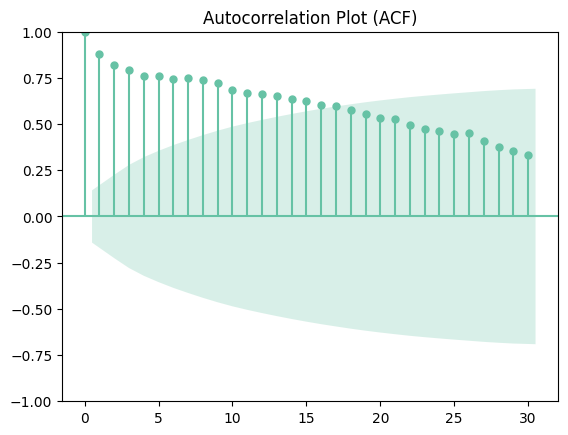

<Figure size 1200x600 with 0 Axes>

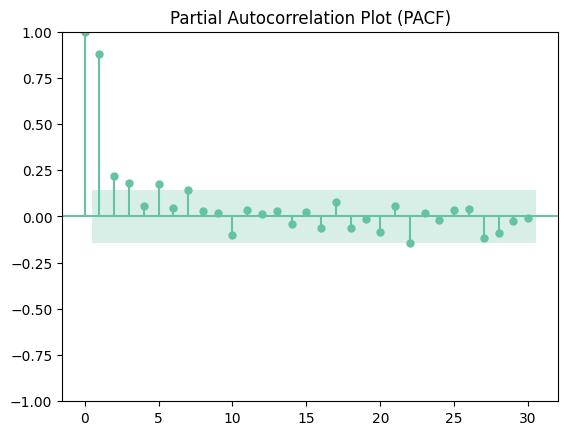

In [133]:

plt.figure(figsize=(12, 6))
plot_acf(train, lags=30)
plt.title("Autocorrelation Plot (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(train, lags=30)
plt.title("Partial Autocorrelation Plot (PACF)")
plt.show()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

ARIMA - MSE: 0.0028014121009215997, MAE: 0.04484956280286576


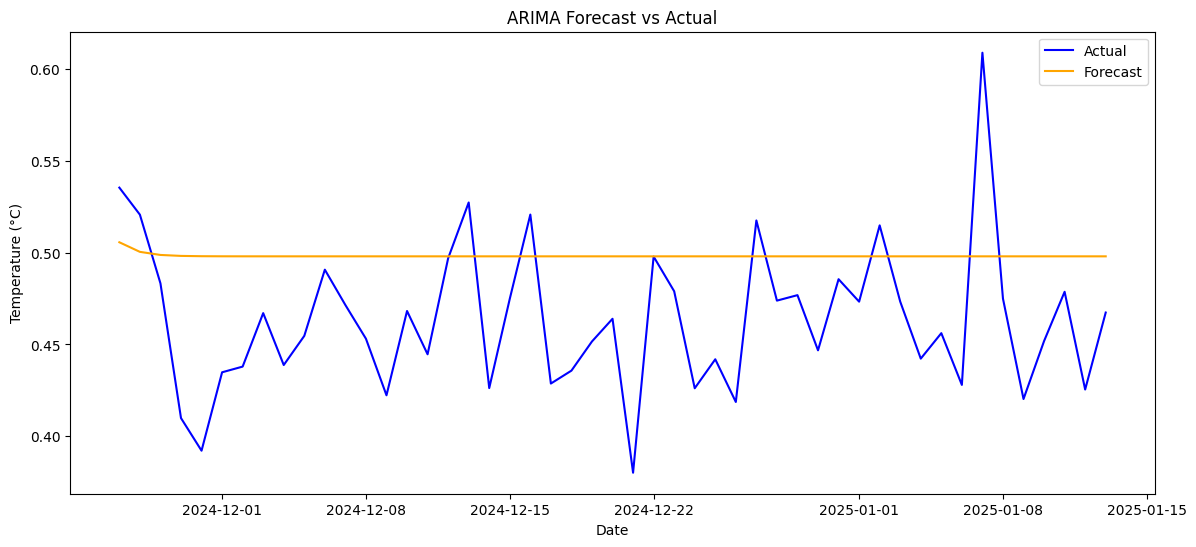

In [134]:

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 1)) 
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test))
forecast.index = test.index
# Evaluate model
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
print(f"ARIMA - MSE: {mse}, MAE: {mae}")

# Plot results
plt.figure(figsize=(14, 6))
plt.plot(test, label='Actual', color='blue')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [50]:
auto_model = auto_arima(train, seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-837.832, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-811.390, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-824.364, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-833.933, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-813.373, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-836.974, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-837.977, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-839.946, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-839.349, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-830.744, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-841.930, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-835.905, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-826.339, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-839.961, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]          

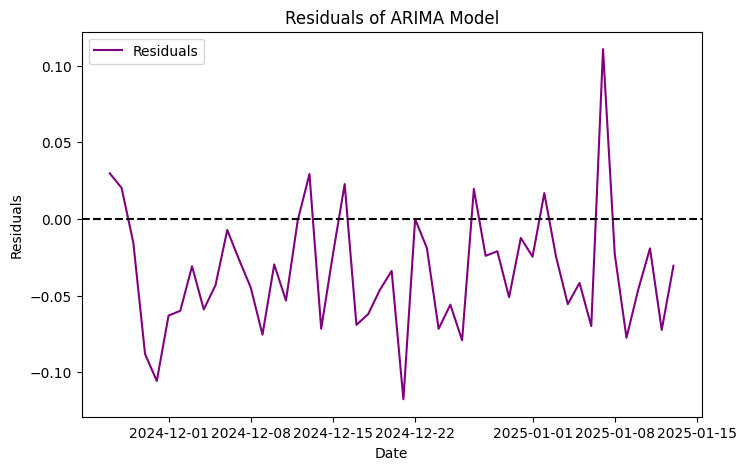

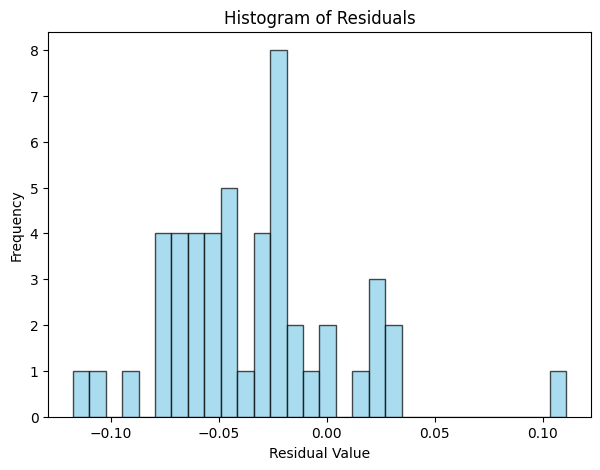

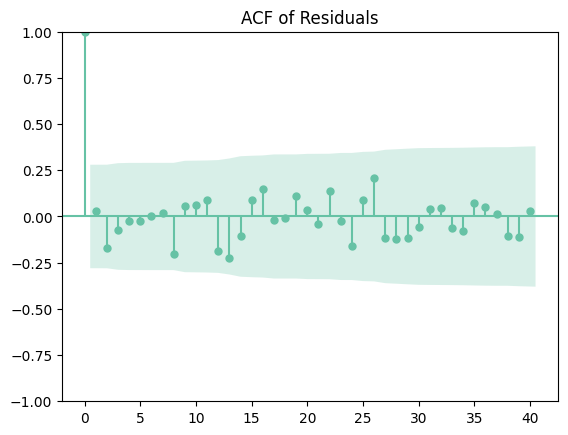

Ljung-Box Test Results:
     lb_stat  lb_pvalue
10  4.997573    0.89134


In [51]:


# Calculate residuals
residuals = test - forecast

# Plot residuals
plt.figure(figsize=(8, 5))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals of ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# ACF plot
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

# Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_result)


In [52]:


def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 30
x_train, y_train = create_sequences(train.values, seq_length)
x_test, y_test = create_sequences(test.values, seq_length)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

forecast = model.predict(x_test)


Epoch 1/20


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2391 - val_loss: 0.1402
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1580 - val_loss: 0.0841
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0913 - val_loss: 0.0385
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0363 - val_loss: 0.0068
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0083
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0041
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 13/20
6/6 ━━━━━

In [53]:
mse = mean_squared_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_test, forecast)
print(f"MSE: {mse}, MAPE: {mape}")


MSE: 0.0020650734236798383, MAPE: 0.06660557726154039
